In [34]:
import numpy as np
import matplotlib.pyplot as pl
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [35]:
X = np.load("digit_data/X.npy")
y = np.load("digit_data/y.npy")
X = X[0:1000]
y = y[0:1000]
print(X.shape)
print(X[0])

(1000, 400)
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e

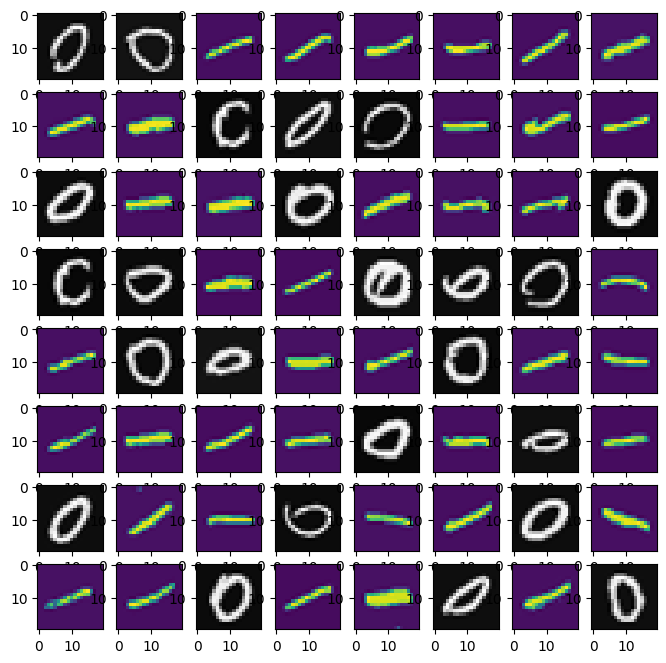

In [36]:
fig,ax = pl.subplots(8,8,figsize=(8,8))
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        r = random.randint(1,1000)
        if y[r] == 1:
            ax[i][j].imshow(X[r].reshape(20,20))
        else:
            ax[i][j].imshow(X[r].reshape(20,20),cmap = 'gray')

# fig.show()
# want ones look like

In [37]:
model = Sequential(
    [
        tf.keras.Input(shape=(400,)),
        Dense(units = 100,activation = 'sigmoid'),
        Dense(units = 50,activation = 'sigmoid'),
        Dense(units = 10,activation = 'sigmoid'),
        Dense(units = 1,activation = 'sigmoid'),
    ],name = "my_model"
)


In [38]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               40100     
                                                                 
 dense_9 (Dense)             (None, 50)                5050      
                                                                 
 dense_10 (Dense)            (None, 10)                510       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 45,671
Trainable params: 45,671
Non-trainable params: 0
_________________________________________________________________


In [39]:
print(model.layers[0].weights[0].shape)
print(model.layers[0].weights[0])


(400, 100)
<tf.Variable 'dense_8/kernel:0' shape=(400, 100) dtype=float32, numpy=
array([[-0.09894135,  0.00974382, -0.04919028, ..., -0.03608444,
         0.03546643, -0.03345663],
       [-0.07663681, -0.096423  , -0.01771246, ...,  0.03762787,
        -0.04997712,  0.06328944],
       [ 0.10772648, -0.09686718,  0.06555451, ...,  0.03284612,
        -0.09511835,  0.09479948],
       ...,
       [ 0.05270744,  0.00720228, -0.00158146, ..., -0.06984498,
        -0.09649856, -0.04032069],
       [-0.09523335,  0.0279106 , -0.0349453 , ..., -0.10499968,
         0.09846627, -0.09326715],
       [ 0.05197353,  0.07172968,  0.05705842, ..., -0.00811712,
        -0.02163371,  0.06482371]], dtype=float32)>


In [40]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X,y,
    epochs=20
)

Epoch 1/20
32/32 [==============================] - 0s 903us/step - loss: 0.6627
Epoch 2/20
32/32 [==============================] - 0s 871us/step - loss: 0.4471
Epoch 3/20
32/32 [==============================] - 0s 871us/step - loss: 0.2673
Epoch 4/20
32/32 [==============================] - 0s 835us/step - loss: 0.1922
Epoch 5/20
32/32 [==============================] - 0s 839us/step - loss: 0.1538
Epoch 6/20
32/32 [==============================] - 0s 871us/step - loss: 0.1287
Epoch 7/20
32/32 [==============================] - 0s 968us/step - loss: 0.1108
Epoch 8/20
32/32 [==============================] - 0s 936us/step - loss: 0.0967
Epoch 9/20
32/32 [==============================] - 0s 968us/step - loss: 0.0857
Epoch 10/20
32/32 [==============================] - 0s 935us/step - loss: 0.0770
Epoch 11/20
32/32 [==============================] - 0s 968us/step - loss: 0.0700
Epoch 12/20
32/32 [==============================] - 0s 968us/step - loss: 0.0640
Epoch 13/20
32/32 [======

In [41]:
X
# print(X[0])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [42]:
def pre(num):
    return 1 if num[0][0]>0.5 else 0
print(pre(model.predict(X[0].reshape(1,400))))
print(pre(model.predict(X[500].reshape(1,400))))

1/1 [==============================] - 0s 44ms/step
0
1/1 [==============================] - 0s 14ms/step
1


1/1 [==============================] - 0s 13ms/step


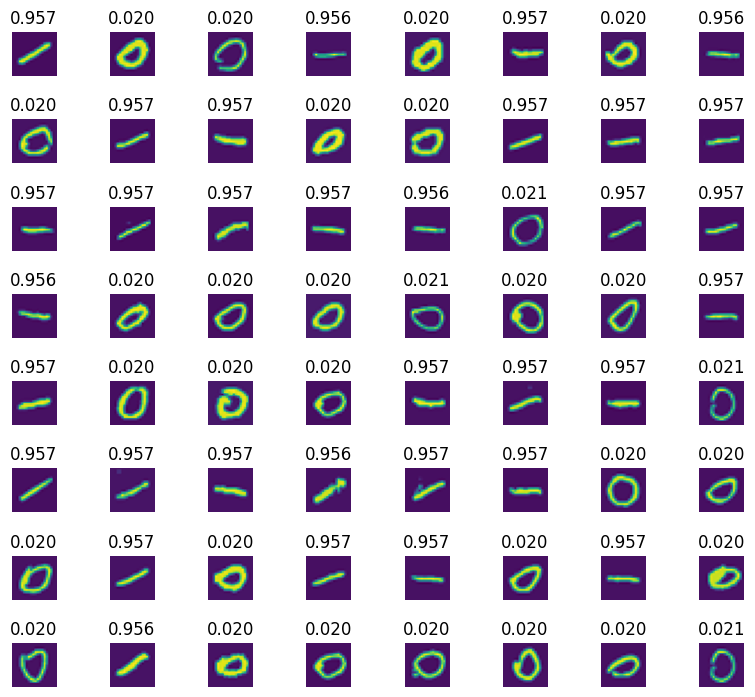

In [43]:
fig,ax = pl.subplots(8,8,figsize=(8,8))
fig.tight_layout(pad=1,rect=[0, 0.03, 1, 0.92])
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        r = random.randint(1,999)
        ax[i][j].set_title("%.3f"%(model.predict(X[r].reshape(1,400))[0][0]))
        ax[i][j].imshow(X[r].reshape(20,20))
        ax[i][j].set_axis_off()
        


In [44]:
layer1,layer2,layer3,layer4 = model.layers

per_w1,per_b1 = layer1.weights
per_w2,per_b2 = layer2.weights
per_w3,per_b3 = layer3.weights
per_w4,per_b4 = layer4.weights
W = [per_w1,per_w2,per_w3,per_w4]
B = [per_b1,per_b2,per_b3,per_b4]

In [45]:
per_b1.shape
print(tf.reshape(X[0],[-1,1]).shape)
tf.transpose(W[0]).shape
B[1]
X[0].shape
W[0].shape

(400, 1)


TensorShape([400, 100])

In [46]:
def my_layer(a_in,per_w,per_b):
    k = tf.constant(tf.reshape(a_in,[-1,1]))
    k = tf.cast(k, tf.float32)
    # tf.cast(per_w,dtype=tf.float32)
    return tf.transpose(per_w)@k + tf.reshape(per_b,[-1,1])
    # return tf.reshape(a_in,[1,-1])@per_w +per_b
def predict_(a_in,W,B):
    # a_out = []
    for i in range(len(W)):
        a_in = my_layer(a_in,W[i],B[i])
        # print(a_in.shape)

    return a_in

In [47]:
# fig,ax = pl.subplots(8,8,figsize=(8,8))
# fig.tight_layout(pad=1,rect=[0, 0.03, 1, 0.92])
for i in range(8):
    for j in range(8):
        r = random.randint(1,1000)
        t_f = (model.predict(X[r].reshape(1,400))[0][0])
        m_f = predict_(X[r],W,B)[0][0]
        print("-------------------------\n",t_f,"== ? :",m_f,"-----------------\n")
        # ax[i][j].set_title("%.3f"%(model.predict(X[r].reshape(1,400))[0][0]),)
        # ax[i][j].imshow(X[r].reshape(20,20))
        # ax[i][j].set_axis_off()
        

1/1 [==============================] - 0s 15ms/step
-------------------------
 0.020164892 == ? : tf.Tensor(-2176.759, shape=(), dtype=float32) -----------------

1/1 [==============================] - 0s 16ms/step
-------------------------
 0.020028846 == ? : tf.Tensor(-3257.6604, shape=(), dtype=float32) -----------------

1/1 [==============================] - 0s 16ms/step
-------------------------
 0.956684 == ? : tf.Tensor(1352.0591, shape=(), dtype=float32) -----------------

1/1 [==============================] - 0s 15ms/step
-------------------------
 0.9563677 == ? : tf.Tensor(852.6012, shape=(), dtype=float32) -----------------

1/1 [==============================] - 0s 15ms/step
-------------------------
 0.020376017 == ? : tf.Tensor(-1734.1725, shape=(), dtype=float32) -----------------

1/1 [==============================] - 0s 15ms/step
-------------------------
 0.95664907 == ? : tf.Tensor(1238.8549, shape=(), dtype=float32) -----------------

1/1 [======================

In [48]:
for r in range(len(right)):
    print(right[r],"------------------------",predict_(X[r],W,B)[0][0])

NameError: name 'right' is not defined